In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
%matplotlib notebook

In [7]:
cosTheta = lambda phi, delta, h : np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.cos(h)

In [12]:
delta=0.5

<IPython.core.display.Javascript object>


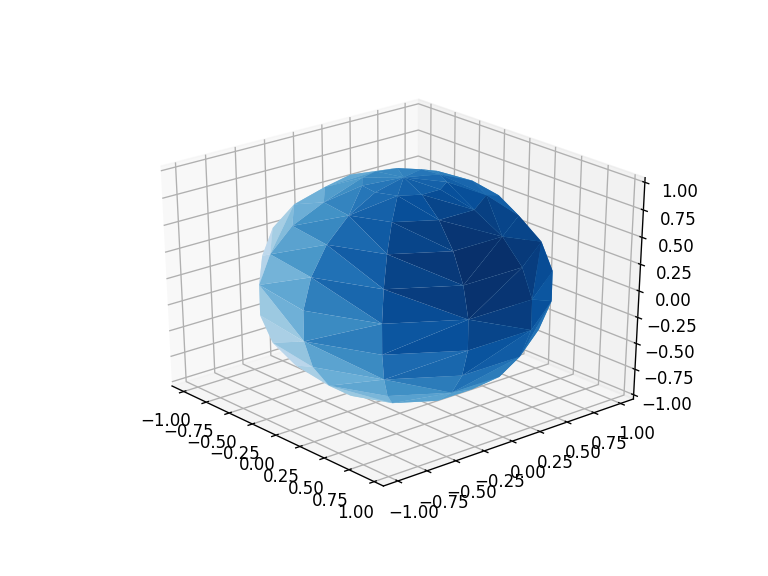

In [13]:
(n, m) = (12, 12)

theta = np.linspace(-np.pi, np.pi, num=n)
phi = np.linspace(np.pi/2, -np.pi/2, num=m)
theta, phi = np.meshgrid(theta, phi)
theta, phi = theta.ravel(), phi.ravel()
theta = np.append(theta, [0.]) # Adding the north pole...
phi = np.append(phi, [np.pi*0.5])
mesh_x, mesh_y = ((np.pi*0.5 - phi)*np.cos(theta), (np.pi*0.5 - phi)*np.sin(theta))
triangles = mtri.Triangulation(mesh_x, mesh_y).triangles
x, y, z = np.cos(phi)*np.cos(theta), np.cos(phi)*np.sin(theta), np.sin(phi)

vals = cosTheta(phi,delta,theta)
colors = np.mean(vals[triangles], axis=1)

# Plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = plt.get_cmap('Blues')
triang = mtri.Triangulation(x, y, triangles)
collec = ax.plot_trisurf(triang, z, cmap=cmap, shade=False, linewidth=0.)
collec.set_array(colors)
collec.autoscale()
plt.show()